# Euler method for integrating ODE's
### Credit: James Boedicker & Manuel Razo.

## A model for bacterial growth.

Conceptually in lecture we explained that we can write a *rate of change* for many processes such as bacterial growth as

\begin{equation}
\text{Stuff now = stuff before + how much was added - how much was subtracted} 
\tag{1}
\end{equation}

This means that if $N$ is the number of cells and $r$ is the growth rate we can write down how the number of cells changes over time as

\begin{equation}
N(t + \Delta t) = N(t) + \Delta t \cdot \ r N(t),
\tag{2}
\end{equation}

where $\Delta t$ is a time step. What is this equation telling us? What this is saying is that the rate at which cells grows depends on the number of cells, which makes sense if you think about it.

Let's rewrite this equation as

\begin{equation}
\frac{N(t + \Delta t) - N(t)}{\Delta t} = rN(t).
\tag{3}
\end{equation}

Refreshing a little bit of your undergrad calculus class you might remember that when $\Delta t$ is very very small the left hand side of equation 3 is equivalent to this concept called a *derivative*, which you might have seen written as

\begin{equation}
\frac{dN}{dt} = rN(t).
\tag{4}
\end{equation}

But if this concept looks like a shady memory from your undergrad freshman year don't worry about that. This is just using "fancy notation" to describe the rate of change at which $\text{stuff}$ changes over time.

Equation $2$ is giving us a numerical recipe for how to compute how the number of cells changes over time. This is the perfect task that we can solve using matlab's numerical power.

All we need to establish is our initial condition, i.e. what's the number of cells at the beginning of our experiment $N(0)$, the growth rate, and then we can ask matlab to apply this formula over and over again to obtain our desired numerical solution to this differential equation.

Let's define the variables we need.

In [1]:
% Define the initial condition
N0 = 1; % One cell at the beginning

% Define the growth rate
r = 1 / 30; % 1 / min

% Define the size of the step
deltaT = 10;

Before running the full program let's compute time point number one manually.

In [2]:
% Compute the derivative evaluated at t = 0.
dN0_dt = r * N0;
% Compute the first time point following the Euler recipe.
N1 = N0 + deltaT * dN0_dt;

% Print both time points
[N0, N1]

ans =

    1.0000    1.3333


We can see that by time 1 (10 minutes after time zero given the $\Delta t$ we chose there is a change in the number of cells. If you are shocked that the model says we could have 1.3 cells you are totally right! But by using a differential equation we are assuming that the number of cells is a continuous rather than a discrete variable. Nevertheless This approximation works incredibly well in the limit of many many cells.

Now let's evaluate many more points by using a `for` loop.

In [7]:
% Initialize an array to save the number of time cells at each time point
N = [];

% Save in this array the initial condition
N(1) = N0;

% initialize time array
timeArray = [0:50 - 1] * deltaT;
% Define the for loop
for t = 2:50
    N(t) = N(t-1) + deltaT * r * N(t-1);
end %for

Having run the `for` loop, let's plot the result!

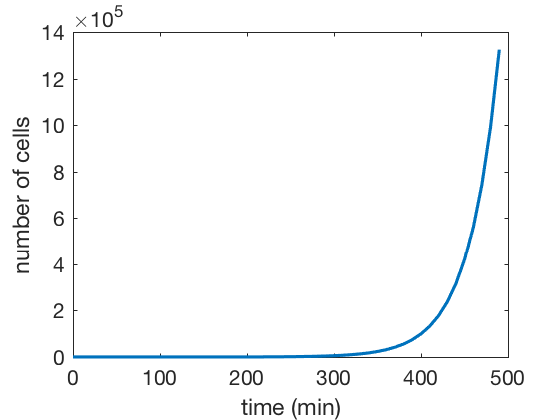

In [10]:
% Plotting the result
plot(timeArray, N, 'LineWidth', 1.5)
xlabel('time (min)')
ylabel('number of cells')

If this is truly exponential growth that means that if we were to plot the y axis in log we should see a line.

There are at least 2 forms that I know of how to get a semilog plot. One of them is with the function... you guessed it `semilogy`. Let's try that one for now

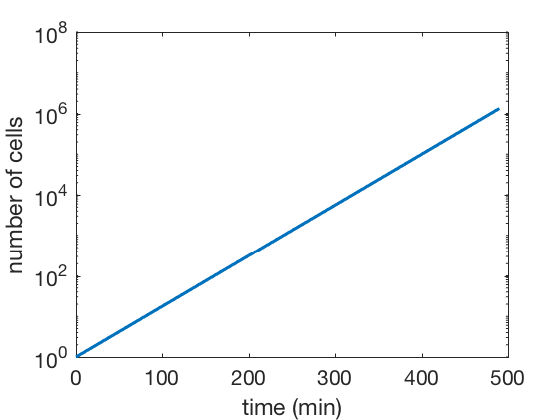

In [11]:
% Plot a semilogy growth curve
semilogy(timeArray, N, 'LineWidth', 1.5)
xlabel('time (min)')
ylabel('number of cells')

## Logistic growth

In the previous plot you see that after roughly 8 hours starting from 1 cell we are already at $10^7$ bugs. That's a lot of biomass!

I have a good order of magnitude calculation for you: How long would it take for these cells to generate the same mass as there is biomass on earth. You'll be surprise of how short this number actually is.

But that doesn't make sense, right? If you have ever grown bacteria in a culture tube you know that by the next morning the cells are not coming out of the tube because the don't fit anymore. So if our model is going to capture a more realistic picture of cell growth it should include an upper bound for how many cells can the environment can actually sustain.

One of the most widely used models in ecology and many other fields is the so-called "logistic growth model". This model is defined as

\begin{equation}
\frac{dN}{dt} = rN \cdot \left( 1 - \frac{N}{K} \right),
\tag{5}
\end{equation}

where $r$ is still the growth rate and $K$ is called the *carrying capacity*. What this parameter captures is this idea of a maximum number of organisms that the environment can sustain.

But again, don't get confused or scared if you see a differential equation like this. Remember the fancy notation is only telling us the rate of change of $\text{stuff}$. We might as well rewrite this equation into our easy numerical recipe

\begin{equation}
N(t + \Delta t) = N(t) + \Delta t rN \cdot \left( 1 - \frac{N}{K} \right).
\tag{6}
\end{equation}

This equation might look a little weird at first sight. But as in almost every case in physics it is useful to analyze some useful "extreme cases". For example let's take the case where $N \ll K$. Then what we would have in the terms in parenthesis is 

\begin{equation}
1 - \text{very small number} \approx 1. 
\tag{7}
\end{equation}

So at this limit you can see that we would recover the exponential growth equation that we saw before, meaning that at the beginning when there are not that many cells they would grow exponentially.

On the other extreme let's take the limit when $r \rightarrow K$. In this case the second term inside the parenthesis would go to one so then we would have 1 - 1 = 0, which shows that once the population reaches the maximum carrying capacity the cells stops growing since the derivative goes to zero.

So by taking these extreme cases we see that the strange-looking equation actually makes sense given the intuition we had with respect to cell growth in a limiting environment. But enough talking, let's solve this equation!

We can use the exact same recipe as before. We just need to initialize the corresponding variables and use a for loop to solve the equation.

In [12]:
% Define the initial condition
N0 = 1; % One cell at the beginning

% Define the growth rate
r = 1 / 30; % 1 / min

% Define the size of the step
deltaT = 10;

% Define the carrying capacity.
% We will assume we have 1 mL of LB where we can grow 10^9 cells
K = 10^9;

In [15]:
% Initialize an array to save the number of time cells at each time point
N = [];

% Save in this array the initial condition
N(1) = N0;

% initialize time array
timeArray = [0:150 - 1] * deltaT;

% Define the for loop
for t = 2:150
    N(t) = N(t-1) + deltaT * r * N(t-1) * (1 - N(t-1) / K);
end %for

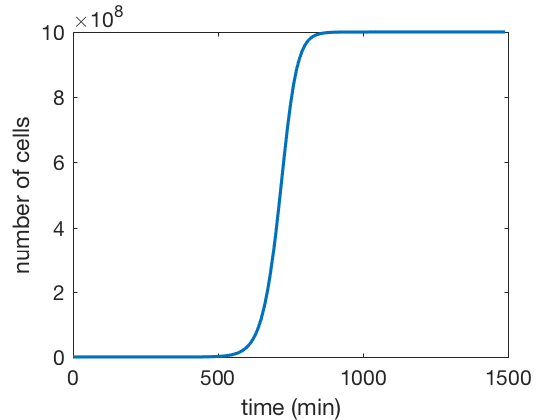

In [16]:
% Plotting the result
plot(timeArray, N, 'LineWidth', 1.5)
xlabel('time (min)')
ylabel('number of cells')

And for completeness let's also plot it in a semilog format.

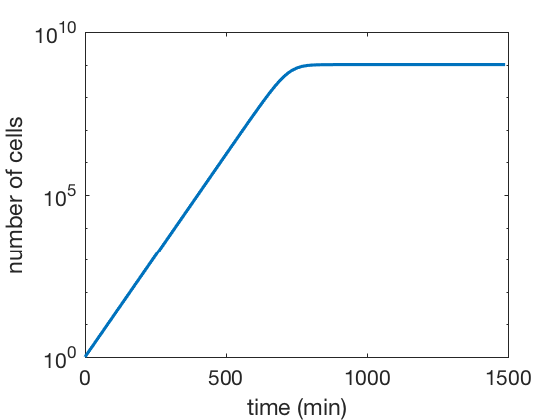

In [17]:
% Plotting the result
semilogy(timeArray, N, 'LineWidth', 1.5)
xlabel('time (min)')
ylabel('number of cells')